In [1]:
#dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import gmaps

#url = "https://data.lacity.org/resource/2nrs-mtv8.json"
#response = requests.get(url).json()
file_path = '../../Resources/crime_data.csv'
file = pd.read_csv(file_path)

data = [file['Date Rptd'], file['DATE OCC'], file['TIME OCC'], file['AREA NAME'], file['Crm Cd Desc'], 
       file['Vict Age'],file['Vict Sex'], file['Vict Descent'], file['Premis Desc'], file['Weapon Desc'], 
       file['LOCATION'], file['LAT'], file['LON']]
df = pd.DataFrame(data)
df = df.transpose()
df.head()

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LOCATION,LAT,LON
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.298
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.254
2,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,77th Street,VANDALISM - MISDEAMEANOR ($399 OR UNDER),62,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,700 E 73RD ST,33.9739,-118.263
3,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,5400 CORTEEN PL,34.1685,-118.402
4,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,NaN,14400 TITUS ST,34.2198,-118.447


In [2]:
df.describe()

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LOCATION,LAT,LON
count,301486,301486,301486,301486,301486,301486,262085,262080,301381,110324,301486,301486.0,301486.0000
unique,566,566,1439,21,133,101,4,19,301,78,48899,5166.0,4859.0000
top,07/05/2021 12:00:00 AM,05/30/2020 12:00:00 AM,1200,77th Street,VEHICLE - STOLEN,0,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",6TH ST,0.0,-118.2739
freq,713,910,10801,19905,32553,73540,128418,92582,77849,58891,536,2070.0,2274.0000


In [11]:
df = df.dropna()

In [13]:
df.shape

(110251, 13)

/Users/meaganmb_11/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # This is added back by InteractiveShellApp.init_path()


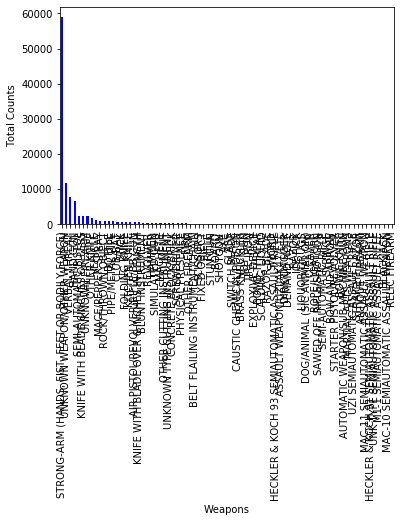

In [7]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
total_data = df["Weapon Desc"].value_counts()
# total_data
total_data.plot(kind="bar", facecolor="blue")

# Set textual properties
plt.ylabel("Total Counts")
plt.xlabel("Weapons")

# Show plot
# plt.tight_layout()
plt.show()

In [8]:
df["Weapon Desc"].unique()

array(['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'UNKNOWN WEAPON/OTHER WEAPON', nan, 'VERBAL THREAT',
       'ROCK/THROWN OBJECT', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN',
       'FOLDING KNIFE', 'RAZOR', 'BLUNT INSTRUMENT', 'BOTTLE',
       'OTHER CUTTING INSTRUMENT', 'HAND GUN', 'PHYSICAL PRESENCE',
       'VEHICLE', 'SCISSORS', 'STICK', 'MACHETE', 'OTHER KNIFE',
       'MACE/PEPPER SPRAY', 'KNIFE WITH BLADE 6INCHES OR LESS', 'FIRE',
       'SEMI-AUTOMATIC PISTOL', 'GLASS', 'SIMULATED GUN',
       'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'DEMAND NOTE',
       'BOMB THREAT', 'PIPE/METAL PIPE', 'ICE PICK', 'UNKNOWN FIREARM',
       'STUN GUN', 'KITCHEN KNIFE', 'SCREWDRIVER', 'SHOTGUN',
       'BELT FLAILING INSTRUMENT/CHAIN', 'HAMMER', 'SEMI-AUTOMATIC RIFLE',
       'UNKNOWN TYPE CUTTING INSTRUMENT', 'BRASS KNUCKLES',
       'FIXED OBJECT', 'REVOLVER', 'SWITCH BLADE', 'CLUB/BAT', 'AXE',
       'RIFLE', 'ASSAULT WEAPON/UZI/AK47/ETC', 'OTHER FIREARM',
       'ANTIQUE FIREARM

In [14]:
# Set x axis and tick locations
x_axis = df["Weapon Desc"].unique()
# tick_locations = [value+0.4 for value in x_axis]

/Users/meaganmb_11/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  app.launch_new_instance()


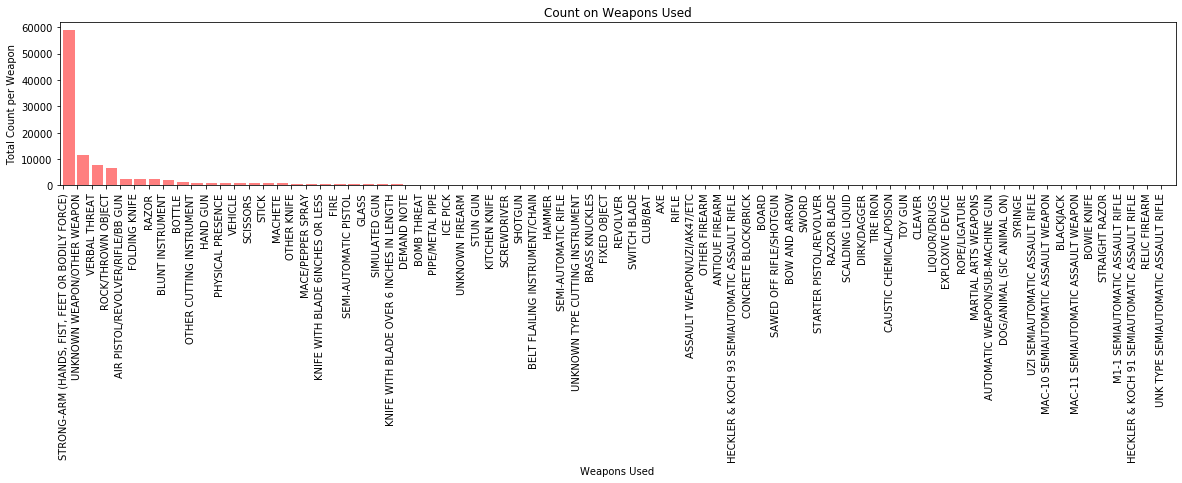

In [29]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, df["Weapon Desc"].value_counts(), color='r', alpha=0.5, align="edge")
# plt.xticks(df["Weapon Desc"], rotation="vertical")
plt.xticks(rotation=90)

# Set x and y limits
plt.xlim(-0.25, len(x_axis))

# Set a Title and labels
plt.title("Count on Weapons Used")
plt.xlabel("Weapons Used")
plt.ylabel("Total Count per Weapon")

# Save our graph and show the grap
plt.tight_layout()
plt.show()

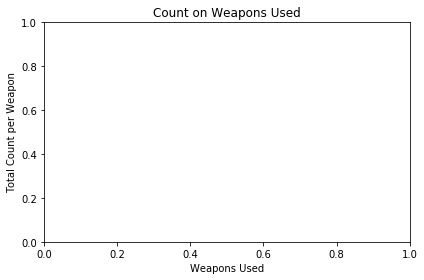

In [31]:
ethnicity = df["Vict Descent"].value_counts()
ethnicity

H    50069
B    24727
W    18791
O     7211
X     6952
A     2171
K      185
F       56
I       26
C       14
G        9
V        9
J        7
U        6
S        6
P        6
Z        4
L        1
D        1
Name: Vict Descent, dtype: int64

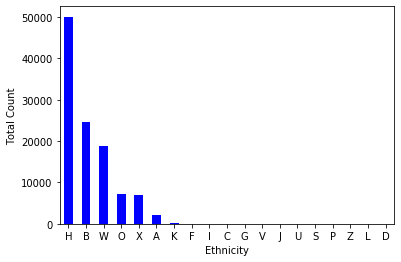

In [36]:
ethnicity.plot(kind="bar", facecolor="blue")

# Set textual properties
plt.ylabel("Total Count")
plt.xlabel("Ethnicity")
plt.xticks(rotation=0)

# Show plot
# plt.tight_layout()
plt.show()

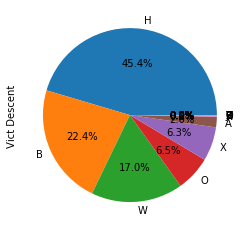

In [37]:
# Pie? Not the best idea
ethnicity = df["Vict Descent"].value_counts()
ethnicity.plot(kind="pie", y = "Sex", autopct = "%1.1f%%")

# Show plot
plt.show()

In [38]:
crime_info = df["Crm Cd Desc"].value_counts()
crime_info

BATTERY - SIMPLE ASSAULT                             24604
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       18174
INTIMATE PARTNER - SIMPLE ASSAULT                    16482
ROBBERY                                              10532
CRIMINAL THREATS - NO WEAPON DISPLAYED                6387
                                                     ...  
PANDERING                                                1
DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400        1
PICKPOCKET, ATTEMPT                                      1
TELEPHONE PROPERTY - DAMAGE                              1
SEX OFFENDER REGISTRANT OUT OF COMPLIANCE                1
Name: Crm Cd Desc, Length: 105, dtype: int64